<a href="https://colab.research.google.com/github/AyakaSenpai/nama-syaeful-ardhi_231011401249/blob/main/emotion-based-spotify-song-recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.cluster import KMeans

from surprise import Dataset, Reader, KNNBasic, NMF, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

import tensorflow as tf
from tensorflow.keras import layers, Model





A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

ImportError: numpy.core.multiarray failed to import (auto-generated because you didn't call 'numpy.import_array()' after cimporting numpy; use '<void>numpy._import_array' to disable if you are certain you don't need it).

In [5]:
import pandas as pd

from google.colab import files

filenya =  files.upload()



Saving light_spotify_dataset.csv to light_spotify_dataset (2).csv


In [ ]:
filenya

In [7]:
import io
df = pd.read_csv(io.StringIO(filenya['light_spotify_dataset.csv to light_spotify_dataset (2).csv']. decode ('utf-8')))
print (df)

KeyError: 'light_spotify_dataset.csv to light_spotify_dataset (2).csv'

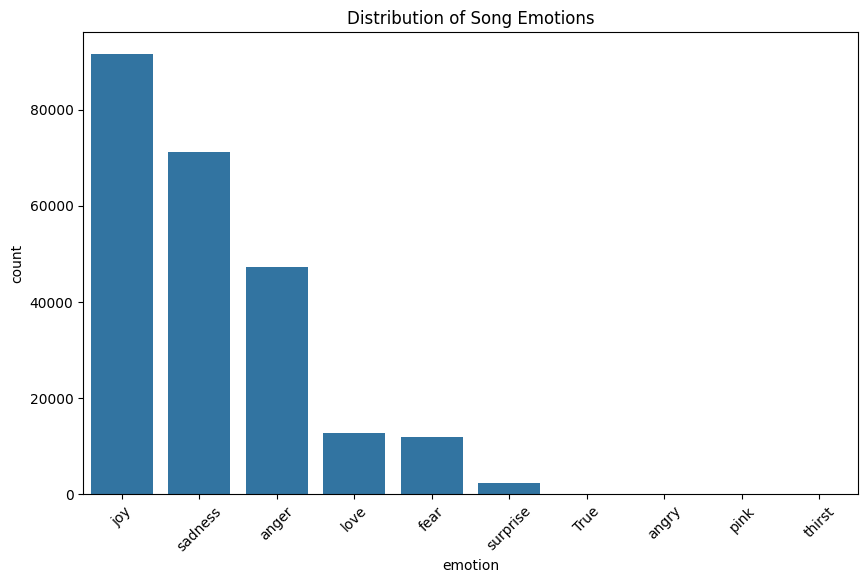

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Atur ukuran plot
plt.figure(figsize=(10, 6))

# Buat countplot berdasarkan kolom 'emotion'
sns.countplot(
    data=df,
    x='emotion',
    order=df['emotion'].value_counts().index  # urutkan berdasarkan jumlah terbanyak
)

# Tambahkan judul dan putar label sumbu X biar lebih enak dibaca
plt.title('Distribution of Song Emotions')
plt.xticks(rotation=45)

# Tampilkan plot
plt.show()


In [ ]:

df['emotion'] = df['emotion'].replace('angry', 'anger')


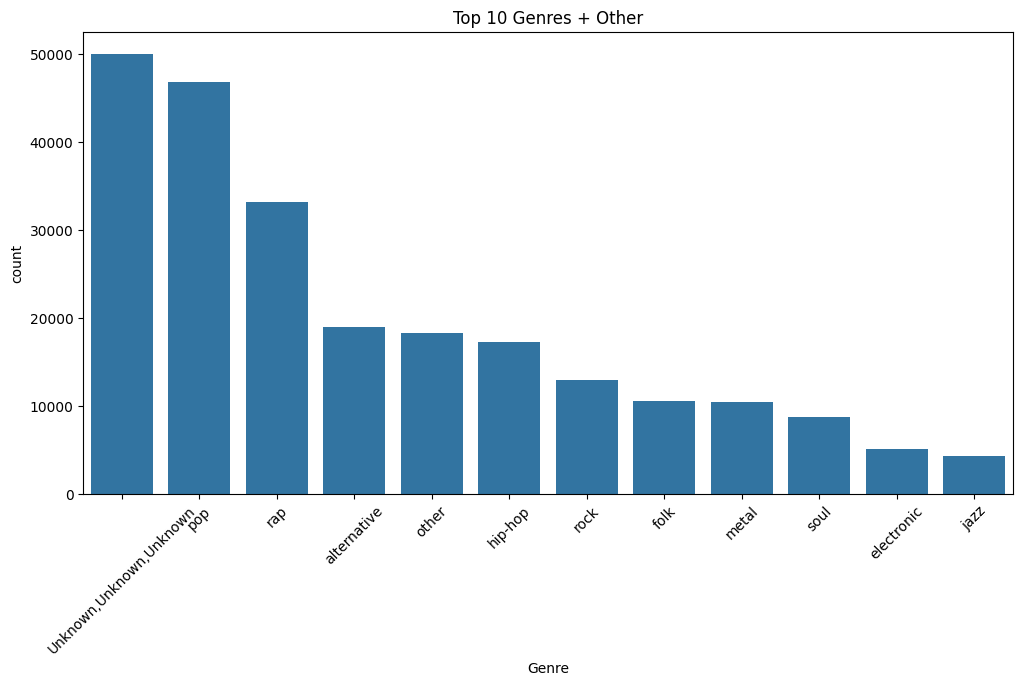

In [ ]:
top_genres = df['Genre'].value_counts().nlargest(11).index
df['Genre']=df['Genre'].apply(lambda x: x if x in top_genres else 'other')

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Genre', order=df['Genre'].value_counts().index)
plt.title('Top 10 Genres + Other')
plt.xticks(rotation=45)
plt.show()


Genre
other          0.288120
pop            0.197829
rap            0.140108
alternative    0.080380
hip-hop        0.073071
rock           0.054669
folk           0.044812
metal          0.044268
soul           0.036884
electronic     0.021706
jazz           0.018153
Name: proportion, dtype: float64


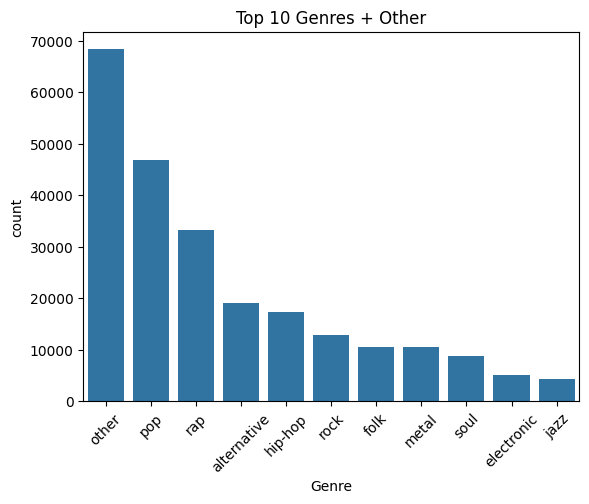

In [ ]:
df['Genre']=df['Genre'].replace('Unknown,Unknown,Unknown','other')
print(df['Genre'].value_counts(normalize=True))
sns.countplot(data=df, x='Genre', order=df['Genre'].value_counts().index)
plt.title('Top 10 Genres + Other')
plt.xticks(rotation=45)
plt.show()

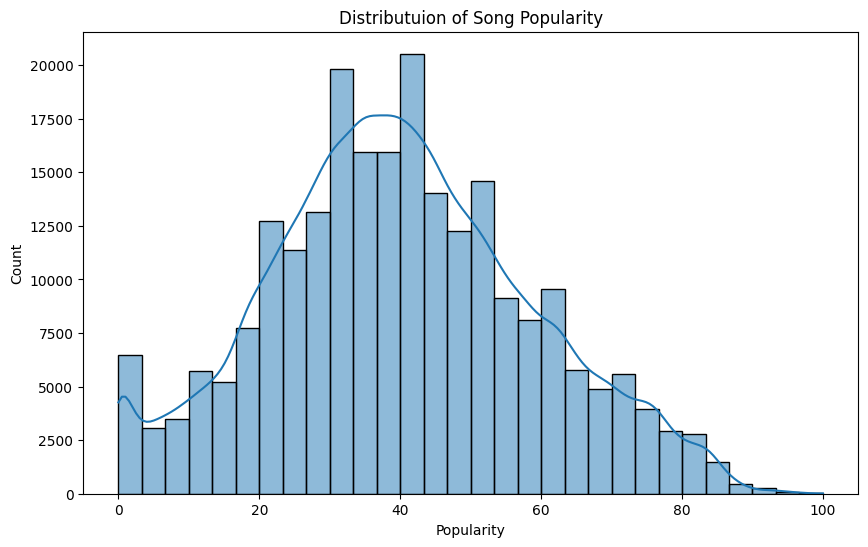

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Popularity'],bins=30, kde=True)
plt.title('Distributuion of Song Popularity')
plt.show()


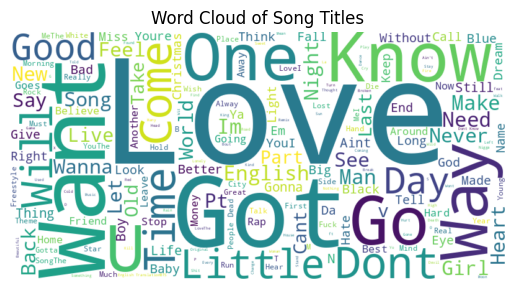

In [ ]:
from wordcloud import WordCloud

text =''.join(df['song'].dropna())

wordcloud = WordCloud(width=800,height=400, background_color='white').generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Song Titles')
plt.axis('off')
plt.show()

In [ ]:
import difflib


def fuzzy_match_emotion(user_input, valid_emotions):
    closest = difflib.get_close_matches(user_input, valid_emotions, n=1, cutoff=0.5)
    return closest[0] if closest else None


def recommend_by_emotion_fuzzy(emotion_label, top_n=10):

    emotion_aliases = {
        'happy': 'joy',
        'cheerful': 'joy',
        'romance': 'love',
        'romantic': 'love',
        'depressed': 'sadness',
        'mad': 'anger',
        'rage': 'anger',
        'relax': 'joy',
        'chill': 'joy',
        'cry': 'sadness'
    }

    valid_emotions = df['emotion'].unique().tolist()


    if emotion_label in emotion_aliases:
        emotion_label = emotion_aliases[emotion_label]


    if not emotion_label:
        print("No emotion specified. Showing random recommendations.")
        return df.sample(n=top_n)[['song', 'artist', 'Genre', 'Popularity']]

    matched_emotion = fuzzy_match_emotion(emotion_label, valid_emotions)

    if not matched_emotion:
        print(f"No close match for emotion: '{emotion_label}'. Showing random recommendations.")
        return df.sample(n=top_n)[['song', 'artist', 'Genre', 'Popularity']]

    filtered = df[df['emotion'] == matched_emotion]

    if filtered.empty:
        print(f"No songs found for emotion: '{matched_emotion}'. Showing random recommendations.")
        return df.sample(n=top_n)[['song', 'artist', 'Genre', 'Popularity']]

    print(f"Showing songs for emotion: '{matched_emotion}'")
    top_songs = filtered.sort_values(by='Popularity', ascending=False).head(top_n)
    return top_songs[['song', 'artist', 'Genre', 'Popularity']]

In [ ]:
recommend_by_emotion_fuzzy('happy')

Showing songs for emotion: 'joy'


,song,artist,Genre,Popularity
219931,Lifetime,Ben&Ben,other,100
219937,Doors,Ben&Ben,other,100
219936,War,Ben&Ben,other,100
219939,Limasawa Street,Ben&Ben,other,100
219932,Make It With You,Ben&Ben,other,100
219933,Fall,Ben&Ben,other,100
219928,Maybe The Night,Ben&Ben,other,100
223443,Never Gonna Regret U,BEAUZ & SIIGHTS,other,99
181895,Stripes Like Burberry,Future & Lil Uzi Vert,other,96
181887,Mink Flow,Future & Young Thug,other,96


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
import numpy as np


feature_cols = ['Energy', 'Danceability', 'Positiveness', 'Tempo', 'Acousticness', 'Instrumentalness']



scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[feature_cols])



song_to_index = pd.Series(df.index, index=df['song']).dropna()



def recommend_similar_songs(song_name, top_n=10):
    if song_name not in song_to_index:
        print(f"Song '{song_name}' not found in dataset. Try another one.")
        return df.sample(n=top_n)[['song','artist','Genre','Popularity']]

    idx = song_to_index[song_name]
    target_vector = X_scaled[idx].reshape(1, -1)
    sim_scores = cosine_similarity(target_vector, X_scaled)[0]

    top_indices = np.argsort(sim_scores)[::-1]
    top_indices = top_indices[top_indices != idx][:top_n]


    return df.iloc[top_indices][['song', 'artist', 'Genre', 'Popularity']]


In [ ]:
recommend_similar_songs('Bang-A-Boomerang')

,song,artist,Genre,Popularity
3,Bang,ABBA,pop,52
18784,Let Me Love You Baby,Stevie Ray Vaughan,rock,46
178135,You,George Harrison,rock,38
14868,The Boy From The Chemist Is Here To See You,Omd,pop,16
79937,Fun House,The Stooges,other,32
51658,There Is A Light That Never Goes Out,Smiths,alternative,83
80053,There Is a Light That Never Goes Out,The Smiths,alternative,82
4200,Twistin' The Night Away,Divine,pop,11
14593,Mechanical Wonder,Ocean Colour Scene,pop,32
221534,One Little Slip,Barenaked Ladies,alternative,46


In [ ]:
from sklearn.cluster import KMeans


feature_cols = ['Energy', 'Danceability', 'Positiveness', 'Tempo', 'Acousticness', 'Instrumentalness']


kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

df['cluster'] = cluster_labels


user_profile = {
    'Energy': 80,
    'Danceability': 85,
    'Positiveness': 70,
    'Tempo': 120,
    'Acousticness': 10,
    'Instrumentalness': 5
}


user_df = pd.DataFrame([user_profile])
user_scaled = scaler.transform(user_df)

user_cluster = kmeans.predict(user_scaled)[0]

def recommend_from_cluster(user_cluster, top_n=10):
    subset = df[df['cluster'] == user_cluster]
    return subset.sort_values(by='Popularity', ascending=False).head(top_n)[['song', 'artist', 'Genre', 'Popularity']]

In [ ]:
recommend_from_cluster(user_cluster)

,song,artist,Genre,Popularity
88927,​working,Tate McRae & Khalid,other,97
88928,​lie to me,Tate McRae & Ali Gatie,other,97
88931,3am,Tate McRae,other,97
170424,I See Dead People,Iam GreedyBoy,other,97
123017,Hurt Somebody,Noah Kahan & Julia Michaels,other,95
13037,Que Sera!,Miley Cyrus,pop,94
13034,Old Blue Jeans,Miley Cyrus,pop,94
43990,This Is The Life,Miley Cyrus,pop,94
43899,All The Time,Miley Cyrus,pop,94
54372,Sound Siren,Unwritten Law,alternative,94


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler


df['is_joy'] = df['emotion'].apply(lambda x: 1 if x == 'joy' else 0)


feature_cols = ['Energy', 'Danceability', 'Positiveness', 'Tempo', 'Acousticness', 'Instrumentalness']


X = df[feature_cols]
y = df['is_joy']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


logreg = LogisticRegression()
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6112283218701211

Confusion Matrix:
 [[28968     3]
 [18424     3]]

Classification Report:
               precision    recall  f1-score   support

           0       0.61      1.00      0.76     28971
           1       0.50      0.00      0.00     18427

    accuracy                           0.61     47398
   macro avg       0.56      0.50      0.38     47398
weighted avg       0.57      0.61      0.46     47398



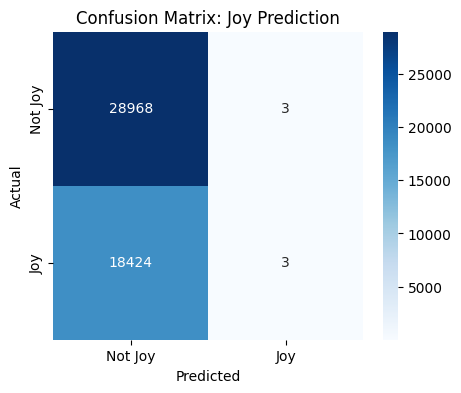

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Joy', 'Joy'], yticklabels=['Not Joy', 'Joy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Joy Prediction')
plt.show()
